### Preprocessing data:
#### 1. Import data set

In [1]:
import pandas as pd 

df = pd.read_csv("train_labeled.tsv", sep="\t")
df.head()


,#1 tweet_ID,#2 tweet_content,#3 country_label,#4 province_label
0,TRAIN_1,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,iq_Al-Anbar
1,TRAIN_2,ي دينيييي ربنا يستر,Egypt,eg_Alexandria
2,TRAIN_3,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,iq_Maysan
3,TRAIN_4,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ma_Oriental
4,TRAIN_5,لأ ني حاضرها هذي لايف,Libya,ly_Al-Jabal-al-Akhdar


#### 2. Analyze tweet labels 

In [2]:
df['#3 country_label'].value_counts()

Egypt                   4473
Iraq                    2556
Saudi_Arabia            2312
Algeria                 1491
Oman                    1098
Morocco                 1070
Libya                   1070
Syria                   1070
United_Arab_Emirates    1070
Yemen                    851
Tunisia                  750
Lebanon                  639
Jordan                   426
Palestine                420
Kuwait                   420
Qatar                    234
Mauritania               210
Somalia                  210
Djibouti                 210
Sudan                    210
Bahrain                  210
Name: #3 country_label, dtype: int64

#### 3. Balance the data set 

In [5]:
df = df[(df['#3 country_label']== 'Egypt' ) | (df['#3 country_label']== 'Iraq') |
        (df['#3 country_label']== 'Saudi_Arabia') | (df['#3 country_label']== 'Algeria' ) | 
        (df['#3 country_label']== 'Oman' ) | (df['#3 country_label']== 'Libya' ) |
        (df['#3 country_label']== 'Syria' ) | (df['#3 country_label']== 'Morocco' ) |
       (df['#3 country_label']== 'United_Arab_Emirates' )]
grouped = df.groupby('#3 country_label')
df = grouped.apply(lambda x: x.sample(n=1070 , random_state = 1))
df['#3 country_label'].value_counts()

Algeria                 1070
Egypt                   1070
United_Arab_Emirates    1070
Saudi_Arabia            1070
Syria                   1070
Iraq                    1070
Morocco                 1070
Libya                   1070
Oman                    1070
Name: #3 country_label, dtype: int64

In [6]:
df = pd.DataFrame(df).reset_index(level='#3 country_label', drop=  True)

In [7]:
df = df.reset_index()
df.head()

,index,#1 tweet_ID,#2 tweet_content,#3 country_label,#4 province_label
0,1297,TRAIN_1298,محلاك يا زياد,Algeria,dz_Jijel
1,15681,TRAIN_15682,نندب حنكي بالقرداش,Algeria,dz_Khenchela
2,12874,TRAIN_12875,بداها بشوي باش مايشوكيش لي مصدقينو نفاقو يمكن ...,Algeria,dz_Bordj-Bou-Arreridj‎
3,9744,TRAIN_9745,يا عقلية وحدة يمشي بيها الشعب هدا,Algeria,dz_Bouira
4,7917,TRAIN_7918,في سبات عميق و الأحسن أن لا يتدخلوا لأن تدخلهم...,Algeria,dz_Ouargla


#### 4. Exctract tweets from df and tokenize for further preprocessing

In [8]:
import nltk
nltk.download('punkt')
tweets = df['#2 tweet_content'].apply(nltk.word_tokenize)
print(tweets[5:25])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohamedelkhawaga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


5     ['انها, حزينة, ., حزناً, عميقاً،, كأنها, تحمل,...
6                      [الكل, يريد, أن, ينهش, من, لحمك]
7     [العبيد, هم, الذين, يهربون, من, الحرية, فإذا, ...
8     [فانون, عرب, يباركون, للجزائر, #, شجع_الخضرpic...
9     [كان, مسروق, بن, الأجدع, وهو, من, أئمة, التابع...
10      [و, عندنا, 5, آبار, تع, المياه, الصالحة, للشرب]
11                 [ناخذ, قهوة, ونروق, لمباراة, الملكي]
12                      [مبرووووووك, لقطر, من, الجزائر]
13              [@, ALZaid6, اتقي, شر, من, أحسنت, اليه]
14    [صلوا, على, من, أحب, فأفصح, :, 'إنى, قد, رزقت,...
15        [كيما, نgولو, ..., ..., كيما, نgولو, ..., ..]
16                  [ومسؤول, عن, تزوير, تشرعييات, 2002]
17    [J'aime, une, vidéo, @, YouTube, :, 'حل, مفصل,...
18    [اللهم, ابعد, عن, #, الجزائر, كل, سوء, وبلاء, ...
19    [اللهم, إني, أعوذ, بك, من, عذاب, القبر, ومن, ع...
20    [مبروك, الصدارة, ومبروك, لهم, وسام, لعبنا, احس...
21                [ألف, مبروك, والشفاء, العاجل, للزوجة]
22         [قلناها, من, قبل, لكن, لا, حياة, لمن,

#### 5. Remove Stopwords 

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))
for index, value in tweets.items():
    for w in value:
        if w in stop_words:
            value.remove(w) 
print(tweets[5:25])

5     ['انها, حزينة, ., حزناً, عميقاً،, كأنها, تحمل,...
6                              [الكل, يريد, ينهش, لحمك]
7     [العبيد, يهربون, الحرية, طردهم, سيد, بحثوا, سي...
8     [فانون, عرب, يباركون, للجزائر, #, شجع_الخضرpic...
9     [كان, مسروق, بن, الأجدع, أئمة, التابعين, والتق...
10      [و, عندنا, 5, آبار, تع, المياه, الصالحة, للشرب]
11                 [ناخذ, قهوة, ونروق, لمباراة, الملكي]
12                          [مبرووووووك, لقطر, الجزائر]
13                  [@, ALZaid6, اتقي, شر, أحسنت, اليه]
14           [صلوا, أحب, فأفصح, :, 'إنى, رزقت, حبها, ']
15        [كيما, نgولو, ..., ..., كيما, نgولو, ..., ..]
16                      [ومسؤول, تزوير, تشرعييات, 2002]
17    [J'aime, une, vidéo, @, YouTube, :, 'حل, مفصل,...
18    [اللهم, ابعد, #, الجزائر, سوء, وبلاء, و, اجعل,...
19    [اللهم, إني, أعوذ, عذاب, القبر, عذاب, جهنم, فت...
20    [مبروك, الصدارة, ومبروك, وسام, لعبنا, احسن, منهم]
21                [ألف, مبروك, والشفاء, العاجل, للزوجة]
22                      [قلناها, قبل, حياة, لمن,

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohamedelkhawaga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 6. Remove non alphabetic tokens

In [13]:
import string
punct = string.punctuation
for index, value in tweets.items():
    for w in value:
         if not(w.isalpha()) :
            value.remove(w)
print(tweets[5:25])

5     [حزينة, كأنها, تحمل, أعماقها, انها, ثرثارة, وه...
6                              [الكل, يريد, ينهش, لحمك]
7     [العبيد, يهربون, الحرية, طردهم, سيد, بحثوا, سي...
8                        [فانون, عرب, يباركون, للجزائر]
9     [كان, مسروق, بن, الأجدع, أئمة, التابعين, والتق...
10         [و, عندنا, آبار, تع, المياه, الصالحة, للشرب]
11                 [ناخذ, قهوة, ونروق, لمباراة, الملكي]
12                          [مبرووووووك, لقطر, الجزائر]
13                              [اتقي, شر, أحسنت, اليه]
14                       [صلوا, أحب, فأفصح, رزقت, حبها]
15                           [كيما, نgولو, كيما, نgولو]
16                            [ومسؤول, تزوير, تشرعييات]
17    [une, vidéo, YouTube, مفصل, لدالة, اسية, المنا...
18    [اللهم, ابعد, الجزائر, سوء, وبلاء, و, اجعل, شع...
19    [اللهم, إني, أعوذ, عذاب, القبر, عذاب, جهنم, فت...
20    [مبروك, الصدارة, ومبروك, وسام, لعبنا, احسن, منهم]
21                [ألف, مبروك, والشفاء, العاجل, للزوجة]
22                      [قلناها, قبل, حياة, لمن,

#### 7. Remove English Words and Links

In [17]:
import re 
for index, value in tweets.items():
    for w in value:
         if re.search('[a-zA-Z]', w) or re.search("[._@z'+#-?&!/,]", w):
            value.remove(w)
print(tweets[5:25])


5     [حزينة, كأنها, تحمل, أعماقها, انها, ثرثارة, وه...
6                              [الكل, يريد, ينهش, لحمك]
7     [العبيد, يهربون, الحرية, طردهم, سيد, بحثوا, سي...
8                        [فانون, عرب, يباركون, للجزائر]
9     [كان, مسروق, بن, الأجدع, أئمة, التابعين, والتق...
10         [و, عندنا, آبار, تع, المياه, الصالحة, للشرب]
11                 [ناخذ, قهوة, ونروق, لمباراة, الملكي]
12                          [مبرووووووك, لقطر, الجزائر]
13                              [اتقي, شر, أحسنت, اليه]
14                       [صلوا, أحب, فأفصح, رزقت, حبها]
15                                         [كيما, كيما]
16                            [ومسؤول, تزوير, تشرعييات]
17           [مفصل, لدالة, اسية, المناقشة, البيانية, à]
18    [اللهم, ابعد, الجزائر, سوء, وبلاء, و, اجعل, شع...
19    [اللهم, إني, أعوذ, عذاب, القبر, عذاب, جهنم, فت...
20    [مبروك, الصدارة, ومبروك, وسام, لعبنا, احسن, منهم]
21                [ألف, مبروك, والشفاء, العاجل, للزوجة]
22                      [قلناها, قبل, حياة, لمن,

## For feature extraction from text Doc2Vec is used to generate document embeddings
#### 8. Construct tagged document for model training

In [18]:
import gensim
tokenized_docs_df =  pd.DataFrame(tweets)
taggedlist = [gensim.models.doc2vec.TaggedDocument( row[1], [row[0]]) for row in tokenized_docs_df.itertuples()]
model = gensim.models.doc2vec.Doc2Vec(vector_size=1024, min_count=1, epochs=40)
model.build_vocab(taggedlist)
print("Dictionary Size:")
print(len(model.wv.vocab))
model.train(taggedlist, total_examples=model.corpus_count, epochs=model.epochs)

Dictionary Size:
37755


#### 9. Generate Embeddings from trained model

In [19]:
doc2vec_embedding_list = []
for index, value in tweets.items():
        doc2vec_embedding_list.append(model.infer_vector(value))
print("First Document Embedding")
print(doc2vec_embedding_list[:1])

exported_df = pd.DataFrame(doc2vec_embedding_list)

First Document Embedding
[array([ 0.04114782, -0.02241673, -0.01469391, ...,  0.03024332,
       -0.04828729, -0.00450278], dtype=float32)]


In [20]:
len(exported_df)

9630

#### Visualize Generated Embeddings in Vector Space

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

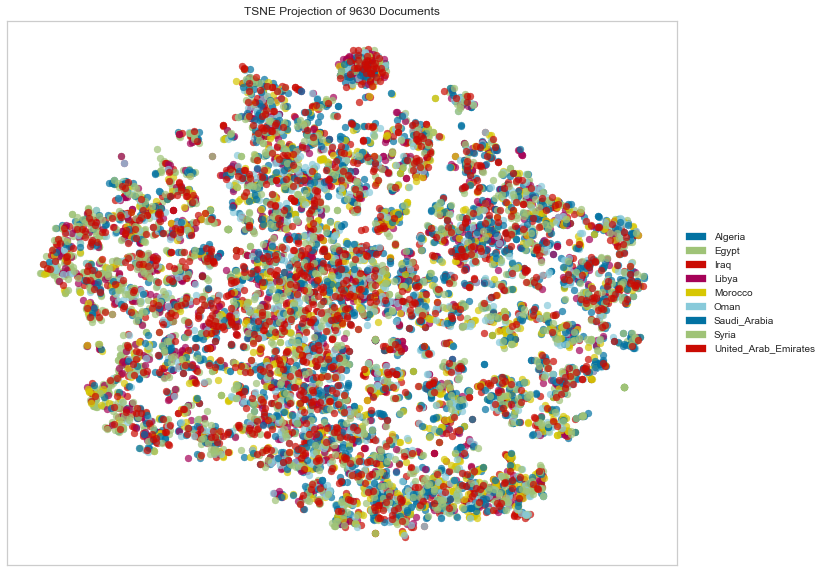

In [32]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer(decompose = "pca", size=(1080, 720))
tsne.fit(exported_df, df['#3 country_label'])
tsne.show()

#### Convert label column into numbers for future classification 

In [21]:
country2Num = df['#3 country_label']
country2Num = pd.DataFrame(country2Num.replace({ 'Iraq' : 1 ,'Egypt' : 2,'Saudi_Arabia' : 3,'United_Arab_Emirates':4,'Algeria' : 5, 'Oman' : 6, 'Syria' : 7, 'Libya' : 8 , 'Morocco' : 9}))
print(country2Num)

      #3 country_label
0                    5
1                    5
2                    5
3                    5
4                    5
...                ...
9625                 4
9626                 4
9627                 4
9628                 4
9629                 4

[9630 rows x 1 columns]


#### 10.  Export embeddings to csv file and save inference model 

In [22]:
model.save("1024PreProcessed")
csv_df = pd.concat([exported_df,country2Num], axis = 1)
csv_df.head()


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,#3 country_label
0,0.041148,-0.022417,-0.014694,-0.025992,0.045405,0.007750,-0.004723,-0.018786,0.001576,0.015194,...,0.003304,0.040397,0.032754,0.029644,0.025828,0.040704,0.030243,-0.048287,-0.004503,5
1,0.054707,-0.027681,-0.021453,-0.038285,0.070126,0.006004,-0.001050,-0.027343,-0.002578,0.020226,...,0.003146,0.061549,0.041090,0.032767,0.036031,0.053186,0.051308,-0.072610,-0.007111,5
2,0.088765,-0.004437,-0.052304,-0.064395,0.143207,0.037976,0.015217,-0.058279,-0.049911,0.040762,...,0.000933,0.146175,0.046004,0.057552,0.027259,0.079052,0.098116,-0.104672,-0.000910,5
3,0.013839,0.005687,-0.022975,-0.001623,0.013285,0.039220,-0.002762,-0.010223,-0.014926,0.017023,...,-0.004008,0.027880,0.014283,0.029251,-0.006846,0.023233,-0.004540,0.006293,0.013223,5
4,0.082814,-0.046373,-0.027552,-0.046948,0.089935,0.008666,-0.007375,-0.037496,-0.001153,0.025389,...,0.010472,0.079935,0.068562,0.040215,0.055043,0.070194,0.081510,-0.107124,-0.009639,5


In [23]:
csv_df.to_csv('bembeddings1024.csv',index=False)